<a href="https://colab.research.google.com/github/pritesh2292/Appliance-Energy-Prediction/blob/main/Team_Notebook_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<B> Appliance Energy Prediction

Data-driven prediction of energy use of appliances
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

# Introduction
In this new era ability to predict energy consumption of House appliances not only save the money for consumer but also help in generating money for the user by giving excess energy back to Grid(in solar panel usage).In this case regression analysis will be used to predict Appliance Energy Consumption based on data collected from the sensors.

The energy prediction will be come under supervised machine learining. Aiming to Appliance Energy consumption for house based on factor like temperature, humidity, pressure. Gradient descent algorithm and linear regression applied to predict the energy consumption



In [ ]:
# Import all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing, model_selection, metrics
from sklearn import datasets, linear_model, metrics
from sklearn import ensemble

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

Mounting The Drive

In [ ]:
# mount the drive on colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
path = "/content/drive/MyDrive/Copy of data_application_energy.csv"
df = pd.read_csv(path, parse_dates=['date']) # to change the date dtype as datetime using parse_dates.

In [ ]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
df.shape

(19735, 29)

In [ ]:
df_1 = df
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
# Set the date index
df = df.set_index('date')

In [ ]:
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday
df['Day'] = df.index.day
df['Hour'] = df.index.hour
df['Week'] = df.index.week

In [ ]:
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Day,Hour,Week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,1,0,11,17,2
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,1,0,11,17,2
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,1,0,11,17,2
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,1,0,11,17,2
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,1,0,11,17,2
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,5.333333,43.833333,4.800000,44.919484,44.919484,1,0,11,17,2
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,5.000000,40.000000,4.700000,47.233763,47.233763,1,0,11,18,2
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,5.166667,40.000000,4.683333,33.039890,33.039890,1,0,11,18,2
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,5.333333,40.000000,4.666667,31.455702,31.455702,1,0,11,18,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,Weekday,Day,Hour,Week
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2.977249,16.057411,11.502002,11.393615
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,1.985617,8.450998,6.921953,5.657985
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,0.000000,1.000000,0.000000,2.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,1.000000,9.000000,6.000000,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,3.000000,16.000000,12.000000,11.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,5.000000,23.000000,17.000000,16.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,6.000000,31.000000,23.000000,21.000000


In [ ]:
df.shape

(19735, 33)

Checking for NA values

In [ ]:
# Checking for null values

df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Month          0
Weekday        0
Day            0
Hour           0
Week           0
dtype: int64

#EDA

In [ ]:
# Data visualisation

# understanding the timeseries variation of the applaince energy consumption

visData = go.Scatter(x = df_1.date, mode = 'lines', y = df_1.Appliances)
layout = go.Layout(title = 'Appliance energy consumption measurement', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [ ]:
# adding column to mark  weekdays-0 and weekends-1 for time series evalution
df_1['WEEKDAY'] = ((pd.to_datetime(df_1['date']).dt.dayofweek)// 5 == 1).astype(float)
df_1['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [ ]:
# find the rows of weekday
a_weekday = df_1[df_1['WEEKDAY'] == 0]
# understanding the timeseries variation of the appliances energy consumption
visData = go.Scatter(x = a_weekday.date, mode = "lines", y = a_weekday.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekdays', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [ ]:
a_weekend = df_1[df_1['WEEKDAY'] == 1]
# understanding the timeseries variation of the appliances energy consumption
visData = go.Scatter(x = a_weekend.date, mode = "lines", y = a_weekend.Appliances)
layout = go.Layout(title = 'Appliance Energy Consumption Measurment on Weekends', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))
fig = go.Figure(data = [visData], layout=layout)
iplot(fig)

In [ ]:
# function to be used for plotting
def daily(x, energy_df=df):
  return energy_df.groupby('Weekday')[x].mean()

def hourly(x, energy_df=df):
  return energy_df.groupby('Hour')[x].mean()

def monthly_daily(x, energy_df=df):
  by_day = energy_df.pivot_table(index='Weekday', columns=['Month'], values=x, aggfunc='mean')
  return round(by_day, ndigits=2)

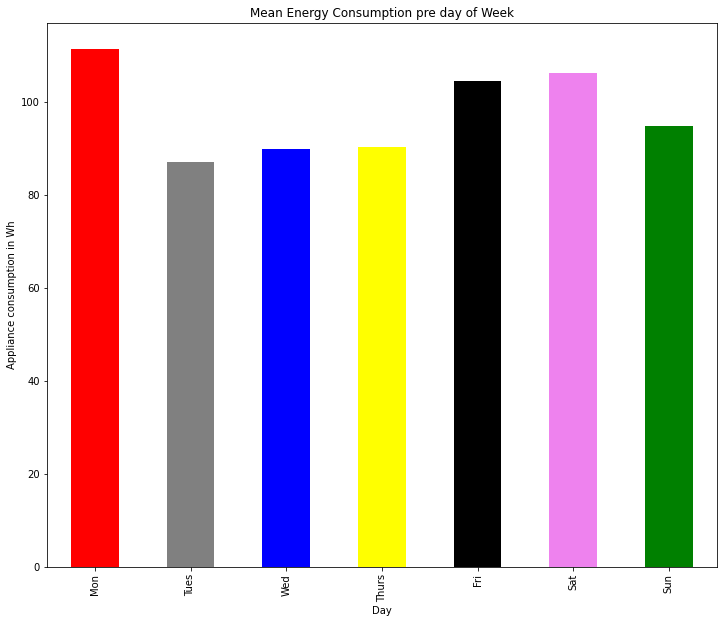

In [ ]:
# plot of mean energy consumption per day of week

daily('Appliances').plot(kind = 'bar', color=['red','grey','blue','yellow','black','violet','green'], figsize = (12,10))
ticks = list(range(0,7,1))
labels = "Mon Tues Wed Thurs Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliance consumption in Wh')
plt.title('Mean Energy Consumption pre day of Week')
plt.xticks(ticks, labels);

The energy consumption is bit high on monday, friday, saturday than the othere day

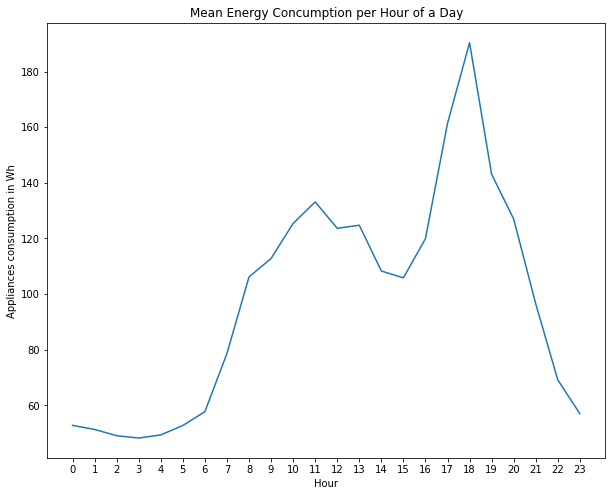

In [ ]:
# mean energy consumption per hour of the day
hourly('Appliances').plot(figsize = (10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0,24,1))
plt.title('Mean Energy Concumption per Hour of a Day')
plt.xticks(ticks);

At night time from 22:00 to 7:00 the energy consumption is below 80Wh, as the most of appliances are off or on stand-by. Between 9:00 to 13:00 the energy consumotion is 120Wh-135Wh and after lunch time reduces again to 110Wh at afternoon, the energy consumption is 130Wh-185Wh as family members arre at home and many devices are on.

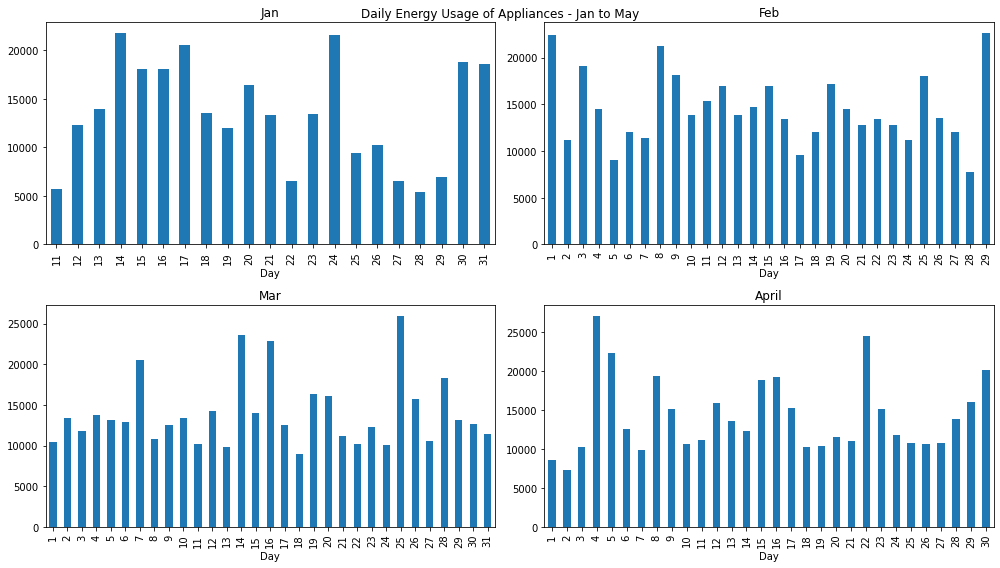

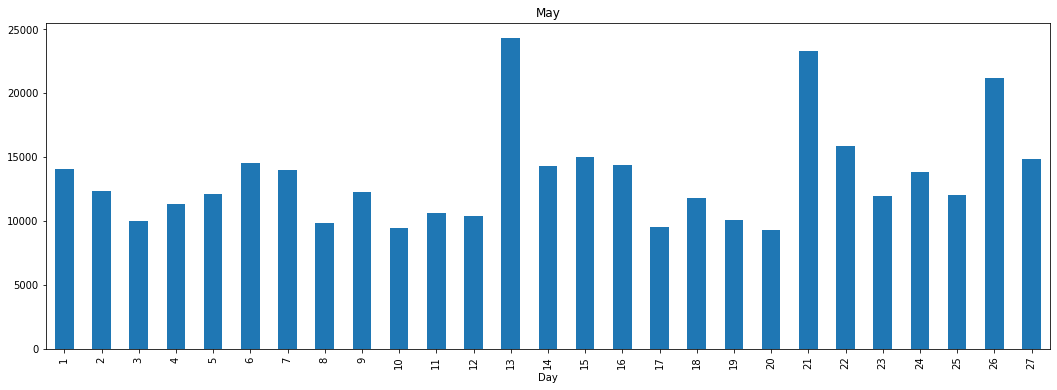

In [ ]:
# daily energy usages of appliances from jan-may
fig, ax = plt.subplots(2,2, figsize=(14,8))
ax = ax.flatten()
months =['Jan', 'Feb', 'Mar', 'April']
for i in range(1,5):
  df.query(f"Month == {i}")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(ax=ax[i-1], title = months[i-1])

plt.suptitle('Daily Energy Usage of Appliances - Jan to May')
plt.tight_layout()
plt.show()

plt.figure(figsize = (18,6))
df.query("Month == 5")[['Day','Appliances']].groupby('Day')['Appliances'].sum().plot.bar(title = 'May')
plt.show()

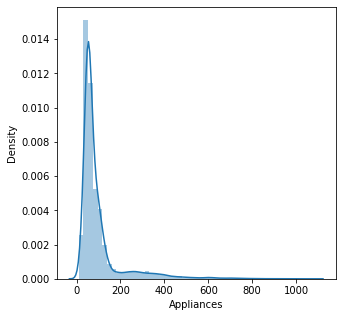

In [ ]:
#target distribution
plt.figure(figsize=(5, 5))
sns.distplot(df['Appliances']);

*   Weekend energy usage is low or high as compare to average day.

*   Some of the months are showing higher energy usage for pre-weekends.

The displots for RH_6, RH_out, Visibility, Windspeed are in focussed due to irregular distribution. It help us to visualize the data better.

Finding the Outliers

The number of the 0, 1% top values of appliances' load is 19 and they have power load higher than 790 Wh


Text(0.5, 1.0, 'Appliances energy consumption distribution')

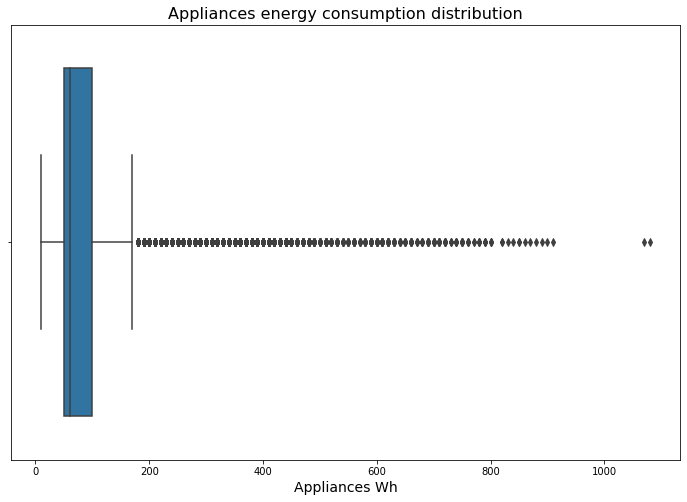

In [ ]:
# finding the outliers
sorted_appliances = df.sort_values('Appliances', ascending = False)
print("The number of the 0, 1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),
      "and they have power load higher than", sorted_appliances.Appliances[19],
      "Wh")

#boxplot for appliances energy consumption
plt.figure(figsize =(12,8))
sns.boxplot(x='Appliances', data=df)
plt.xlabel('Appliances Wh', fontsize=14)
plt.title('Appliances energy consumption distribution', fontsize=16)

In [ ]:
#removel of outliers
drop_df = df.drop(df[(df.Appliances>790)|(df.Appliances<0)].index)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19718 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19718 non-null  int64  
 1   lights       19718 non-null  int64  
 2   T1           19718 non-null  float64
 3   RH_1         19718 non-null  float64
 4   T2           19718 non-null  float64
 5   RH_2         19718 non-null  float64
 6   T3           19718 non-null  float64
 7   RH_3         19718 non-null  float64
 8   T4           19718 non-null  float64
 9   RH_4         19718 non-null  float64
 10  T5           19718 non-null  float64
 11  RH_5         19718 non-null  float64
 12  T6           19718 non-null  float64
 13  RH_6         19718 non-null  float64
 14  T7           19718 non-null  float64
 15  RH_7         19718 non-null  float64
 16  T8           19718 non-null  float64
 17  RH_8         19718 non-null  float64
 18  T9         

In [ ]:
drop_df = drop_df.drop('Month', axis=1)
drop_df = drop_df.drop('Weekday', axis=1)
drop_df = drop_df.drop('Week', axis=1)

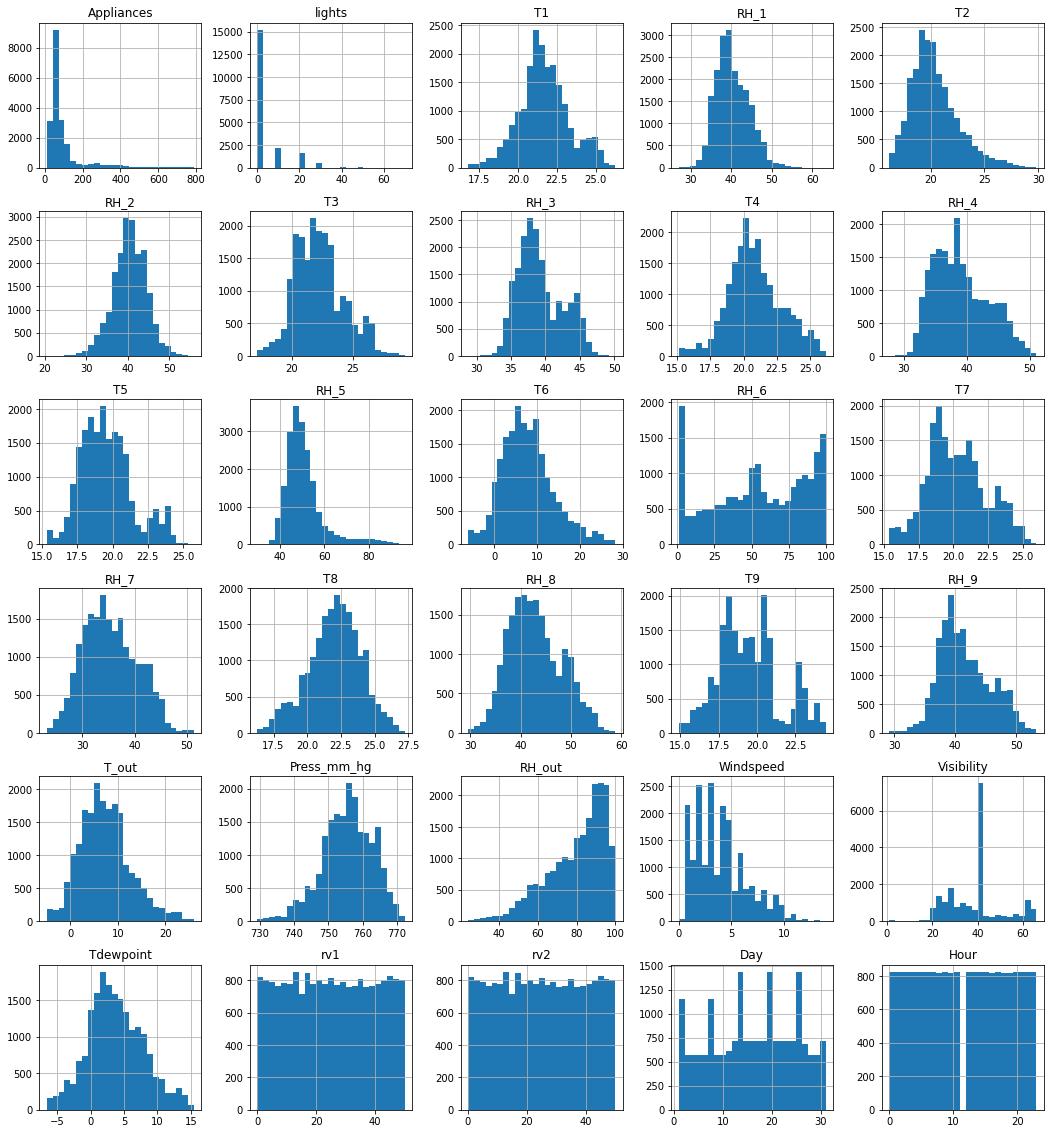

In [ ]:
# hist of all the features to undrstand the distribution
drop_df.hist(bins = 25, figsize = (18,20));

Almost all Temperature variable follows "Normal Distribution".

Almost all Humidity variable follows "Normal Distribution" except RH_Out and 

RH_6, may be because they were placed outside the house

RH_6 has a quite substatial values in bin[1-1.990] which could be rading from summer months(april/may) of data(Jan-June)

Windspeed column is postively skewed & RH_out is negatively skewed

RH_out, Windspeed & Visibility contains outliers

Appliance column is postively skewed with most of the values around mean 100 Wh

In [ ]:
drop_df['log_appliances'] = np.log(drop_df.Appliances)

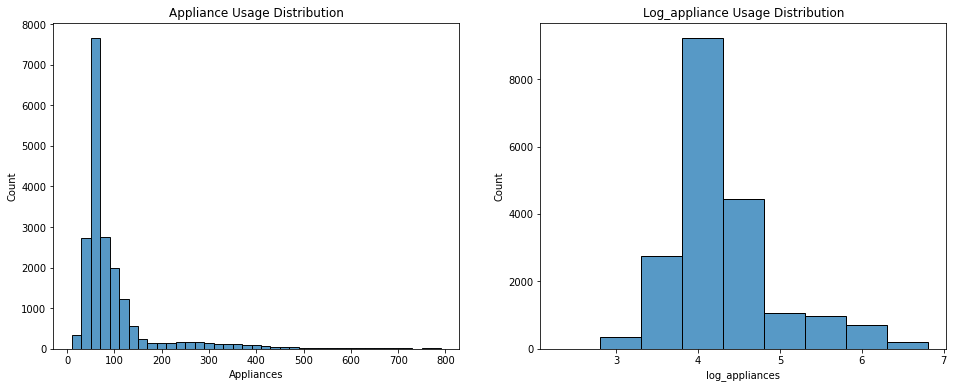

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.histplot(x='Appliances', data=drop_df, binwidth=20, ax=ax[0])
sns.histplot(x='log_appliances', data=drop_df, binwidth=0.5, ax=ax[1])

ax[0].set_title('Appliance Usage Distribution')
ax[1].set_title('Log_appliance Usage Distribution')

plt.show()


*   Appliance hist plot of time series, it shown seasonality component is decreasing it may suggest an exponential decrease from season to season. A log transform can be used to flatten out exponential changes to linear relationship. 
*   We are looking at the mean and variance, we are assume that the data conform Gaussian(bell or normal curve). Appliance log histogram plot from the time series the ball curve-like shape of the Gaussian distribution, perhaps with longer right tail.

Heatmap

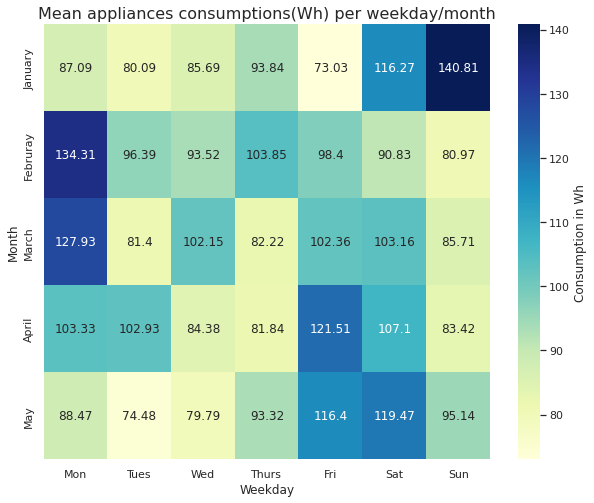

In [ ]:
# heatmap mean appliance consumption per weekday of month
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.heatmap(monthly_daily('Appliances').T,cmap='YlGnBu',
                 xticklabels= 'Mon Tues Wed Thurs Fri Sat Sun'.split(),
                 yticklabels= 'January Februray March April May'.split(),
                 annot=True, fmt='g',
                 cbar_kws= {'label': 'Consumption in Wh'}).set_title('Mean appliances consumptions(Wh) per weekday/month').set_fontsize('16')
plt.show()

As we see from the heatmap we can say that the more power is consumed on mon, fri, sat and sun is valid for each month, however in this dataset we have only 4.5 months and from that we can't use months as feature for our model.

Correlation

In [ ]:
# correlation matrix of all the attributes
drop_df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day,Hour,log_appliances
Appliances,1.000000,0.198201,0.058996,0.087890,0.122590,-0.058680,0.088211,0.037644,0.043280,0.017365,...,-0.039059,-0.155689,0.090528,-0.004157,0.017180,-0.012404,-0.012404,-0.000418,0.219468,0.904056
lights,0.198201,1.000000,-0.022727,0.107266,-0.004990,0.051428,-0.096397,0.131253,-0.008049,0.115113,...,-0.011491,0.068215,0.060741,0.019347,-0.035632,0.000627,0.000627,-0.042234,0.255219,0.261356
T1,0.058996,-0.022727,1.000000,0.163976,0.836827,-0.002565,0.892423,-0.028357,0.876984,0.098001,...,-0.149993,-0.345160,-0.087680,-0.075679,0.571435,-0.006107,-0.006107,-0.127037,0.178995,0.162862
RH_1,0.087890,0.107266,0.163976,1.000000,0.269801,0.797675,0.253182,0.844803,0.105981,0.880435,...,-0.293908,0.274344,0.204946,-0.020756,0.639078,-0.000530,-0.000530,-0.041459,0.018695,0.084759
T2,0.122590,-0.004990,0.836827,0.269801,1.000000,-0.165586,0.735194,0.121740,0.761939,0.231678,...,-0.132719,-0.505242,0.052724,-0.069587,0.582594,-0.010844,-0.010844,-0.157141,0.254971,0.215863
RH_2,-0.058680,0.051428,-0.002565,0.797675,-0.165586,1.000000,0.137318,0.678418,-0.047445,0.721560,...,-0.255419,0.585199,0.068929,-0.004746,0.499169,0.006183,0.006183,0.037354,-0.183140,-0.092709
T3,0.088211,-0.096397,0.892423,0.253182,0.735194,0.137318,1.000000,-0.011087,0.852852,0.122852,...,-0.189364,-0.281216,-0.101017,-0.101767,0.645966,-0.005355,-0.005355,-0.077204,0.037630,0.168772
RH_3,0.037644,0.131253,-0.028357,0.844803,0.121740,0.678418,-0.011087,1.000000,-0.140469,0.899024,...,-0.233397,0.356199,0.263070,0.017251,0.414461,-0.000403,-0.000403,-0.048443,-0.052265,-0.006320
T4,0.043280,-0.008049,0.876984,0.105981,0.761939,-0.047445,0.852852,-0.140469,1.000000,-0.048743,...,-0.074852,-0.388413,-0.185935,-0.104360,0.519326,-0.001759,-0.001759,-0.121880,0.088623,0.134139
RH_4,0.017365,0.115113,0.098001,0.880435,0.231678,0.721560,0.122852,0.899024,-0.048743,1.000000,...,-0.250814,0.336899,0.300231,0.002871,0.616532,-0.001736,-0.001736,-0.005483,-0.018885,-0.006633


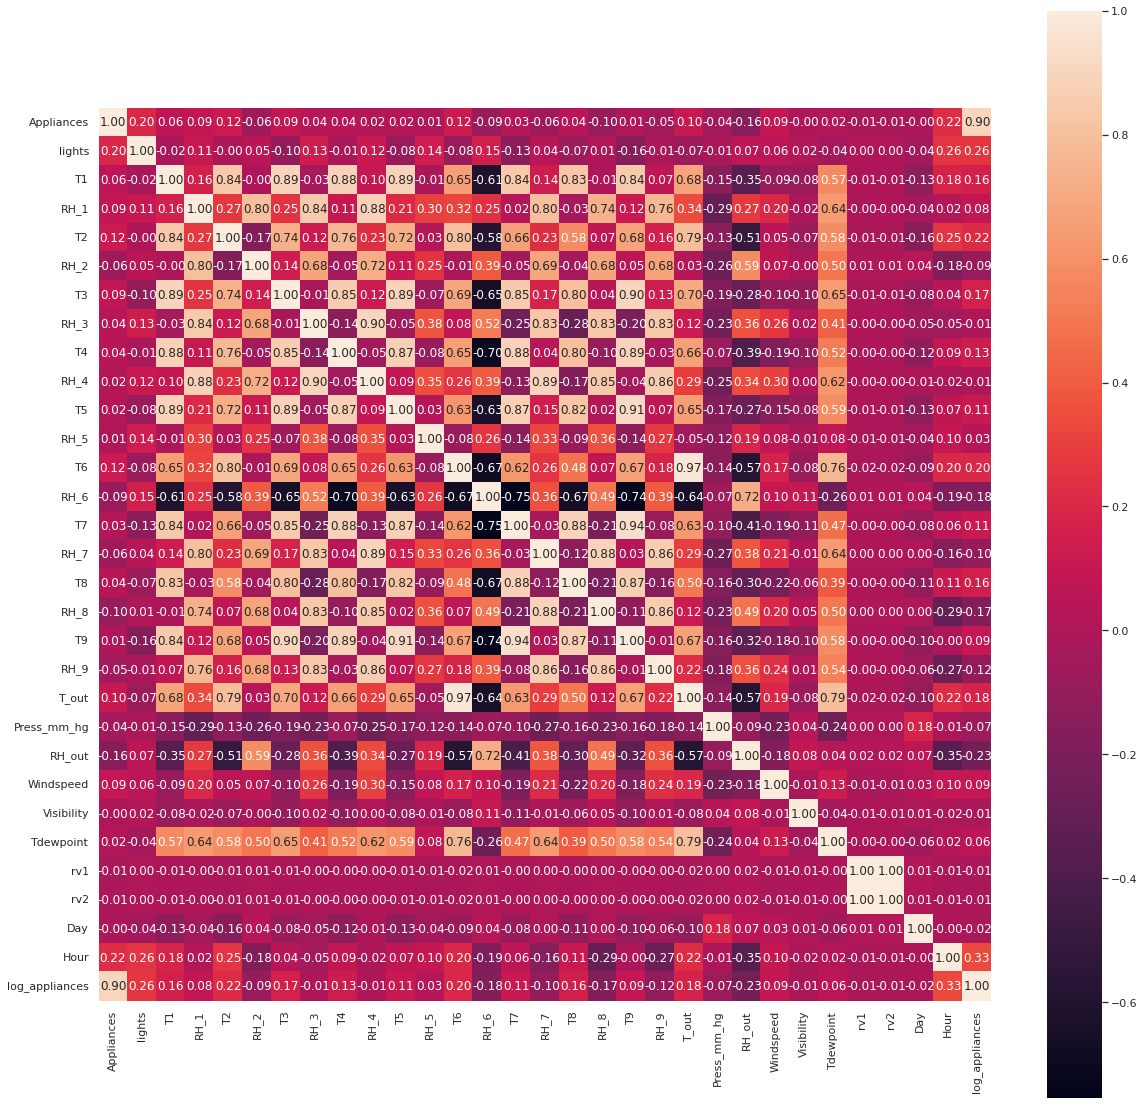

In [ ]:
# plotting correlation matrix
corr = drop_df.corr()
plt.figure(figsize = (20,20))
sns.set(font_scale = 1)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f')
plt.show()

From this we examine linear dependence among some basic feature in this dataset. In linear regression problem only linear independent variables can be used as feature to explain consumption in other way we will have multicollinearity issue.

Muticollinearity

In [ ]:
# checking the multicollinearity

def redundant_pairs(energy):
  ''' Get diagonal and lower tringular pairs of correlation matrix'''
  pairs_to_drop = set()
  colms = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((colms[i], colms[j]))
  return pairs_to_drop

# function to get top correlations

def top_abs_corre(df, n=5):
  au_corr = df.corr().abs().unstack()
  labels_drop = redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_drop).sort_values(ascending=False)
  return au_corr[0:n]

print('Top Absolute Correlations')
print(top_abs_corre(df, 40))

Top Absolute Correlations
rv1    rv2      1.000000
Month  Week     0.977385
T6     T_out    0.974787
T7     T9       0.944776
T5     T9       0.911055
T3     T9       0.901324
RH_3   RH_4     0.898978
RH_4   RH_7     0.894301
T1     T3       0.892402
T9     Month    0.890605
T4     T9       0.889439
T9     Week     0.888777
T3     T5       0.888169
T1     T5       0.885247
RH_7   RH_8     0.883984
T7     T8       0.882123
RH_1   RH_4     0.880359
T4     T7       0.877763
T1     T4       0.877001
T4     T5       0.871813
T5     T7       0.870624
T8     T9       0.869338
RH_7   RH_9     0.858686
RH_4   RH_9     0.856591
RH_8   RH_9     0.855812
T3     T4       0.852778
       T7       0.847374
RH_4   RH_8     0.847259
T1     T9       0.844777
RH_1   RH_3     0.844677
T1     T7       0.838705
       T2       0.836834
T7     Week     0.835119
RH_3   RH_9     0.833538
T7     Month    0.833005
RH_3   RH_7     0.832685
       RH_8     0.828822
T1     T8       0.825413
T5     T8       0.824981

Column Management

In [ ]:
# managing the column
temperature = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
humidity = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']
weather = ['T_out', 'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility']
lights = ['lights']
hour = ['Hour']
random = ['rv1', 'rv2']
appliance = ['Appliances']
app_class = ['Appliances_class']

In [ ]:
feature_v = drop_df[temperature + humidity + weather + random]
target_v = drop_df[appliance]

In [ ]:
# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.25,random_state=40)

In [ ]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_v.columns]
train_y = train[target_v.columns]

In [ ]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_v.columns]
test_y = test[target_v.columns]

In [ ]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [ ]:
# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [ ]:
# Create test and training set by including Appliances column
sc= StandardScaler()
train = train[list(train_X.columns.values) + appliance ]

test = test[list(test_X.columns.values) + appliance ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [ ]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

#Model Implementation

In [ ]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.svm import SVR
models = [['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,]

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[07:24:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.01397252082824707,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 0.013541221618652344,
  'Train_R2_Score': 0.1375528613228285,
  'Test_R2_Score': 0.12139099895516814,
  'Test_RMSE_Score': 0.937341453817568},
 {'Name': 'SVR:',
  'Train_Time': 11.692274808883667,
  'Train_R2_Score': 0.23572363185689527,
  'Test_R2_Score': 0.2099338792025781,
  'Test_RMSE_Score': 0.8888566368078836},
 {'Name': 'RandomForest ',
  'Train_Time': 29.54726529121399,
  'Train_R2_Score': 0.9393264177690678,
  'Test_R2_Score': 0.5557145977210723,
  'Test_RMSE_Score': 0.6665473743695399},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 7.318496942520142,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.632617176565367,
  'Test_RMSE_Score': 0.6061211293418446},
 {'Name': 'GradientBoostingClassifier: ',
  'Train_Time': 6.903994083404541,
  'Train_R2_Score': 0.333526282064575,
  'Test_R2_Score': 0.2319880865899930

In [ ]:
# Convert list to dataframe
model_df = pd.DataFrame(model_data)

In [ ]:
model_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.013973,0.000000,0.000000,1.000000
1,Ridge:,0.013541,0.137553,0.121391,0.937341
2,SVR:,11.692275,0.235724,0.209934,0.888857
3,RandomForest,29.547265,0.939326,0.555715,0.666547
4,ExtraTreeRegressor :,7.318497,1.000000,0.632617,0.606121
5,GradientBoostingClassifier:,6.903994,0.333526,0.231988,0.876363
6,XGBRegressor:,1.580212,0.322174,0.226322,0.879590


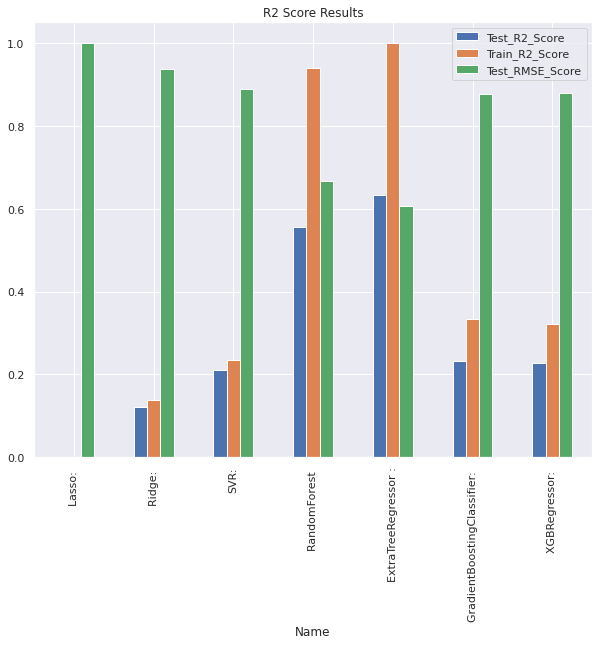

In [ ]:
model_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8));

#Parameter Tunning

In [ ]:
param_grid = [{'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]}]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 150}

In [ ]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=150,
                    random_state=40)

In [ ]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [ ]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6320200276731016

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6066135279788099

#Feature Importance

In [ ]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

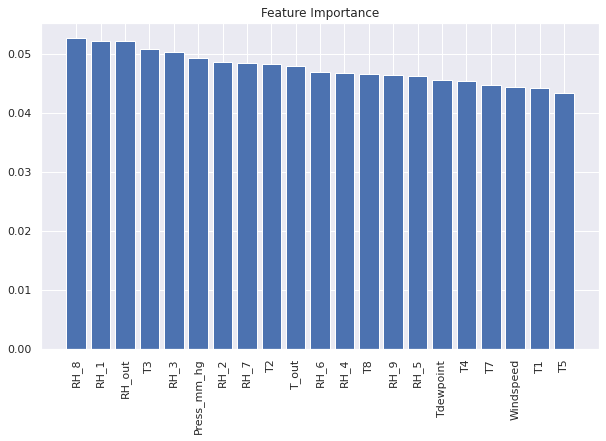

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# Get top 5 most important feature 
names[0:5]

['RH_8', 'RH_1', 'RH_out', 'T3', 'RH_3']

In [ ]:
# Get 5 least important feature 
names[-5:]

['T4', 'T7', 'Windspeed', 'T1', 'T5']

In [ ]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [ ]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=150,
                    random_state=40)

In [ ]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Training set RMSE Score - ', np.sqrt(mean_squared_error(train_y, cloned_model.predict(train_important_feature))))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999837366325176
Testing set R2 Score -  0.4751889249428549
Training set RMSE Score -  0.004032786565444871
Testing set RMSE Score -  0.7244384549823022


#Linear Regression

In [ ]:
# seperate dependent and independent variables
feature_r = temperature + humidity + weather + random
feature_R = drop_df[feature_r]
target_R = drop_df[appliance]

In [ ]:
# take subpart of the data for analysis it has large dataset and was very slow.

a = feature_R.iloc[:1200,:]
b = target_R.iloc[:1200,:]
scaler = StandardScaler()
a= scaler.fit_transform(a)

In [ ]:
x_trainR, x_testR, y_trainR, y_testR = train_test_split(a, b, random_state=0)

In [ ]:
# Linear Regression
linreg= LinearRegression()
linreg.fit(x_trainR, y_trainR)
print(f'Train score for Linear regression model without using Kfold validation is: {linreg.score(x_trainR, y_trainR)}')

train_scores= cross_val_score(linreg,x_trainR,y_trainR, cv=10)
print(f'Train score for Linear regression model using 10Fold cross validation is:  {train_scores.mean()}')
test_scores= cross_val_score(linreg,x_testR,y_testR, cv=10)
print(f'Test score for Linear regression model using 10Fold cross validation is:  {test_scores.mean()}')

Train score for Linear regression model without using Kfold validation is: 0.2485131508562488
Train score for Linear regression model using 10Fold cross validation is:  0.16313486831067534
Test score for Linear regression model using 10Fold cross validation is:  0.014843064285002016


In [ ]:
mse= cross_val_score(linreg, x_trainR, y_trainR, scoring="neg_mean_squared_error", cv=10)
print(f'RMSE for Linear regression model using 10Fold cross validation is: {mse.mean()}')

RMSE for Linear regression model using 10Fold cross validation is: -12934.49670789682


In [ ]:
result = pd.DataFrame(columns = ['Regression', 'Avg_Train_Score', 'Avg_Test_Score', 'RSME_Best'])

In [ ]:
result = result.append({'Regression': 'Linear_Regression', 'Avg_Train_Score': train_scores.mean(),
                        'Avg_Test_Score': test_scores.mean(), 'RSME_Best': mse.mean()}, ignore_index=True)

#Ridge Regression

In [ ]:
# ridge

ridge = Ridge()
param = {'alpha':[0.01, 0.1, 1, 5, 10, 20, 30, 50]}
ridge_regressor = GridSearchCV(ridge, param, cv=10, return_train_score=True)
ridge_regressor.fit(x_trainR, y_trainR)
ridge_regressor.score(x_testR, y_testR)

0.1370999342996575

In [ ]:
ridge_train_score_list = ridge_regressor.cv_results_['mean_train_score']
print(f'Train score across different alpha is: {ridge_train_score_list}')
ridge_test_score_list = ridge_regressor.cv_results_['mean_test_score']
print(f'\nTest score across different alpha is: {ridge_test_score_list}')

Train score across different alpha is: [0.25144838 0.25055341 0.24528778 0.23477538 0.22494715 0.21087917
 0.20071775 0.18636651]

Test score across different alpha is: [0.16327208 0.16317624 0.16129841 0.15889472 0.1541223  0.14573815
 0.13911369 0.12946031]


Best parameter for ridge regression is: {'alpha': 0.01}
Average training score for ridge regression model using 10fold CV is : 0.22562194101227365
Average testing score for ridge regression model using 10fold CV is : 0.151884487591406


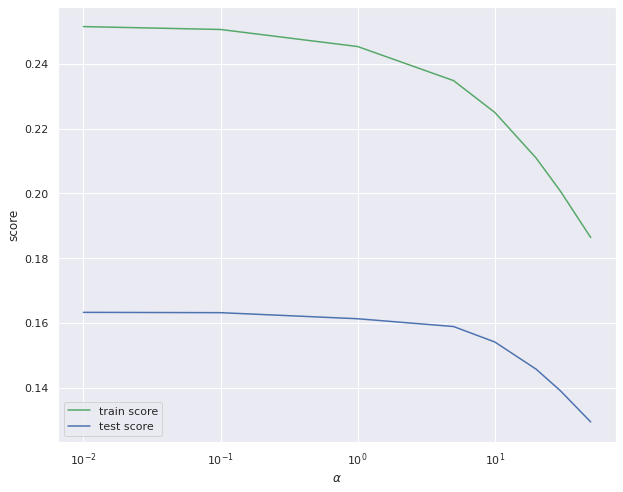

In [ ]:
# visualization of the results
x_range = [0.01, 0.1, 1, 5, 10, 20, 30, 50]
plt.plot(x_range, ridge_train_score_list, c= 'g', label = 'train score')
plt.plot(x_range, ridge_test_score_list, c = 'b', label = 'test score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'$\alpha$')
plt.ylabel('score')

print(f'Best parameter for ridge regression is: {ridge_regressor.best_params_}')
print(f'Average training score for ridge regression model using 10fold CV is : {((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for ridge regression model using 10fold CV is : {((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')

In [ ]:
# final model with best param with root mean squared error(RMSE) as scoring matrics
ridge_final = Ridge(alpha = 0.01)
ridge_final.fit(x_trainR, y_trainR)
ridge_final_train_scores = cross_val_score(ridge_final, x_trainR, y_trainR, cv=10, scoring = 'neg_mean_squared_error')
ridge_final_test_scores = cross_val_score(ridge_final, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Ridge Regression model using 10 fold CV is: {ridge_final_train_scores.mean()}')
print(f'Test RMSE for best Ridge Regression model using 10 fold CV is: {ridge_final_test_scores.mean()}')

Train RMSE for best Ridge Regression model using 10 fold CV is: -12934.082689641664
Test RMSE for best Ridge Regression model using 10 fold CV is: -16290.293754153347


In [ ]:
result = result.append({'Regression': 'Ridge_Regression', 'Avg_Train_Score': ((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range),
                        'Avg_Test_Score': ((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range),
                        'RSME_Best': ridge_final_test_scores.mean()}, ignore_index=True)

#Lasso Regression

In [ ]:
# lasso regression
lasso = Lasso()
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5]}
lasso_regressor = GridSearchCV(lasso, param, cv=10, return_train_score=True)
lasso_regressor.fit(x_trainR, y_trainR)
lasso_regressor.score(x_testR, y_testR)

0.12847488847250932

In [ ]:
lasso_train_score_list = lasso_regressor.cv_results_['mean_train_score']
print(f'Train score across different alpha is: {lasso_train_score_list}')
lasso_test_score_list = lasso_regressor.cv_results_['mean_test_score']
print(f'Test score across different alpha is: {lasso_test_score_list}')

Train score across different alpha is: [0.24833161 0.24830649 0.24804214 0.24440255 0.20322576 0.11480057]
Test score across different alpha is: [0.16021955 0.1602197  0.16021483 0.15946603 0.13882294 0.07704178]


Best Parameter for Lassp regression is: {'alpha': 0.001}
Average training score for Lasso regression model using 10fold CV is : 0.21785151805571992
Average testing score for Lasso regression model using 10fold CV is : 0.14266413805409284


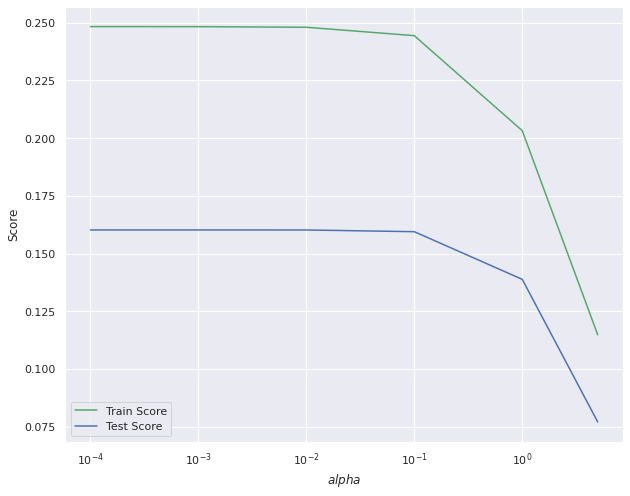

In [ ]:
# plot the results
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 5]
plt.plot(x_range, lasso_train_score_list, c='g', label ='Train Score')
plt.plot(x_range, lasso_test_score_list, c='b', label ='Test Score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'$alpha$')
plt.ylabel('Score')

print(f'Best Parameter for Lassp regression is: {lasso_regressor.best_params_}')
print(f'Average training score for Lasso regression model using 10fold CV is : {((lasso_train_score_list).sum())/len(x_range)}')
print(f'Average testing score for Lasso regression model using 10fold CV is : {((lasso_test_score_list).sum())/len(x_range)}')

In [ ]:
# final model with best param with root mean squared error(RMSE) as scoring matrics
lasso_final = Lasso(alpha = 0.001)
lasso_final.fit(x_trainR, y_trainR)
lasso_final_train_scores = cross_val_score(lasso_final, x_trainR, y_trainR, cv=10, scoring = 'neg_mean_squared_error')
lasso_final_test_scores = cross_val_score(lasso_final, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Lasso Regression model using 10 fold CV is: {lasso_final_train_scores.mean()}')
print(f'Test RMSE for best Lasso Regression model using 10 fold CV is: {lasso_final_test_scores.mean()}')

Train RMSE for best Lasso Regression model using 10 fold CV is: -12986.413570057915
Test RMSE for best Lasso Regression model using 10 fold CV is: -16415.71308423994


In [ ]:
result = result.append({'Regression': 'Lasso_Regression', 'Avg_Train_Score': ((lasso_train_score_list).sum())/len(x_range),
                        'Avg_Test_Score': ((lasso_test_score_list).sum())/len(x_range),
                        'RSME_Best': lasso_final_test_scores.mean()}, ignore_index=True)

#Polynomial Regression

In [ ]:
# polynomial
linreg = LinearRegression()
train_score_list = []
test_score_list = []

for i in [1, 2, 3]:
  poly = PolynomialFeatures(i)
  x_train_poly = poly.fit_transform(x_trainR)
  linreg.fit(x_train_poly, y_trainR)
  train_scores = cross_val_score(linreg, x_train_poly, y_trainR, cv=10)
  test_scores = cross_val_score(linreg, x_testR, y_testR, cv=10)
  train_score_list.append(train_scores)
  test_score_list.append(test_scores)

In [ ]:
poly_train_score_list1 = []
poly_test_score_list1 = []

for n in [0, 1, 2]:
  poly_train_score_list = train_score_list[n].sum()/len(train_score_list[n])
  poly_train_score_list1.append(poly_train_score_list)
  poly_test_score_list = test_score_list[n].sum()/len(test_score_list[n])
  poly_test_score_list1.append(poly_test_score_list)

In [ ]:
print('Best score comes from Degree 2')
print(f'Average Train score across different params is: {poly_train_score_list1}')
print(f'Average Test score across different params is : {poly_test_score_list1}')

Best score comes from Degree 2
Average Train score across different params is: [0.1631348683106753, 0.3498052390817807, -2.9857109056129243]
Average Test score across different params is : [0.014843064285002016, 0.014843064285002016, 0.014843064285002016]


Text(0, 0.5, 'Score')

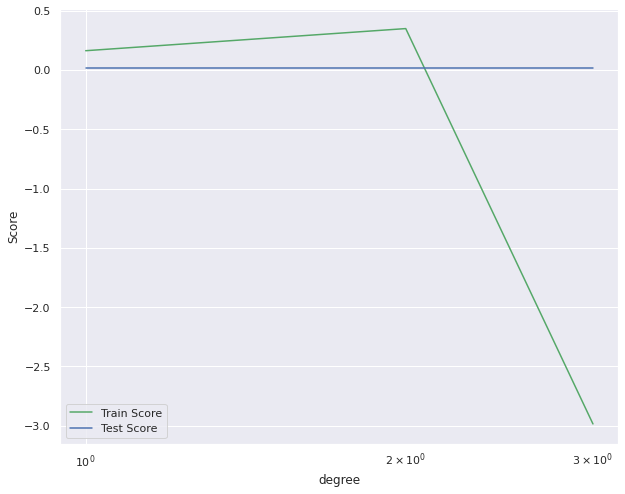

In [ ]:
x_range = [1, 2, 3]
plt.plot(x_range, poly_train_score_list1, c='g', label='Train Score')
plt.plot(x_range, poly_test_score_list1, c='b', label='Test Score')
plt.xscale('log')
plt.legend(loc=3)
plt.xlabel(r'degree')
plt.ylabel('Score')

In [ ]:
poly_final = PolynomialFeatures(degree=2)
x_train_poly_final = poly_final.fit_transform(x_trainR)
poly_final.fit(x_train_poly_final, y_trainR)
linreg.fit(x_train_poly_final, y_trainR)
poly_final_train_scores = cross_val_score(linreg, x_train_poly_final, y_trainR, cv=10, scoring = 'neg_mean_squared_error')
poly_final_test_scores = cross_val_score(linreg, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Poly Regression model using 10 fold CV is: {poly_final_train_scores.mean()}')
print(f'Test RMSE for best Poly Regression model using 10 fold CV is: {poly_final_test_scores.mean()}')

Train RMSE for best Poly Regression model using 10 fold CV is: -9285.048164103864
Test RMSE for best Poly Regression model using 10 fold CV is: -16302.651455106989


In [ ]:
def list_sum(s):
    add=0
    for i in s:
        add= add+i
    return add

                
Avg_train_score= list_sum(poly_train_score_list1)/len(poly_train_score_list1)   
Avg_test_score= list_sum(poly_test_score_list1)/len(poly_test_score_list1)

In [ ]:
result = result.append({'Regression': 'Polynomial_Regression', 'Avg_Train_Score': Avg_train_score,
                        'Avg_Test_Score': Avg_test_score,
                        'RSME_Best': poly_final_test_scores.mean()}, ignore_index=True)

#Decision Tree Regression

In [ ]:
tree = DecisionTreeRegressor()
param_grid = [{'splitter': ['best', 'random'], 'max_depth': np.arange(5,12), 'max_features': [4,5,8,10]}]
tree_regressor = GridSearchCV(tree, param_grid, cv=5, return_train_score =True)

In [ ]:
tree_regressor.fit(x_trainR, y_trainR)
tree_regressor.score(x_testR, y_testR)

0.2956497003328338

In [ ]:
tree_test_score_list = tree_regressor.cv_results_['mean_test_score']
print(f'Test score across different alpha is: {tree_test_score_list}')
tree_train_score_list = tree_regressor.cv_results_['mean_train_score']
print(f'\nTrain score across different alpha is: {tree_train_score_list}')

Test score across different alpha is: [0.01438309 0.10655099 0.17252685 0.03673891 0.13769135 0.09627764
 0.04562841 0.15693701 0.12737515 0.07834146 0.14400889 0.16789602
 0.16135592 0.13912107 0.06748438 0.14568424 0.13788238 0.20228942
 0.18745269 0.13628848 0.12689693 0.11946822 0.11526352 0.20065394
 0.25753823 0.0938476  0.0905692  0.20284758 0.27469701 0.19730751
 0.0557172  0.15038427 0.1120987  0.0965173  0.12536242 0.20498072
 0.11745326 0.10155927 0.05915911 0.24252104 0.24669024 0.07046319
 0.08972197 0.27483001 0.09220674 0.24106791 0.14719128 0.09433754
 0.20611845 0.22861377 0.17852928 0.20089615 0.23341725 0.21881876
 0.22771666 0.16416157]

Train score across different alpha is: [0.37043077 0.23776654 0.40033175 0.256316   0.43251569 0.26884131
 0.37555723 0.28353292 0.47284688 0.28694822 0.50989882 0.32835154
 0.49863188 0.35991824 0.49401726 0.34079805 0.6365338  0.4118716
 0.63005451 0.33508822 0.64190483 0.46276252 0.63059002 0.47876113
 0.66807728 0.44740731 0.729

In [ ]:
print(f'Best parameter for Decision tree regression is: {tree_regressor.best_params_}')
print(f'Average training score for Decision Tree regression model using 10Fold CV is: {(tree_train_score_list.sum())/len(tree_train_score_list)}')
print(f'Average testing score for Decision Tree regression model using 10Fold CV is: {(tree_test_score_list.sum())/len(tree_test_score_list)}')

Best parameter for Decision tree regression is: {'max_depth': 10, 'max_features': 5, 'splitter': 'random'}
Average training score for Decision Tree regression model using 10Fold CV is: 0.6057474123627576
Average testing score for Decision Tree regression model using 10Fold CV is: 0.14859889513900257


In [ ]:
# Decision Tree Regressor model with best estimator found from above analysis
tree_final = DecisionTreeRegressor(max_depth=10, max_features=8, splitter='random')
tree_final.fit(x_trainR, y_trainR)
tree_final_train_score = cross_val_score(tree_final, x_trainR, y_trainR, cv=10, scoring= 'neg_mean_squared_error')
tree_final_test_score = cross_val_score(tree_final, x_testR, y_testR, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Decision Tree Regression model using 10 Fold CV is: {tree_final_train_score.mean()}')
print(f'Test RMSE for best Decision Tree Regression model using 10 Fold CV is: {tree_final_test_score.mean()}')

Train RMSE for best Decision Tree Regression model using 10 Fold CV is: -11765.206884154857
Test RMSE for best Decision Tree Regression model using 10 Fold CV is: -21090.010682747365


In [ ]:
result = result.append({'Regression': 'Decision_Tree_Regression', 'Avg_Train_Score': (tree_train_score_list.sum())/len(tree_train_score_list),
                        'Avg_Test_Score': (tree_test_score_list.sum())/len(tree_test_score_list),
                        'RSME_Best': tree_final_test_score.mean()}, ignore_index=True)

In [ ]:
#Appending all the results of regression model to better understanding
result

,Regression,Avg_Train_Score,Avg_Test_Score,RSME_Best
0,Linear_Regression,-2.985711,0.014843,-12934.496708
1,Ridge_Regression,0.601659,0.405025,-16290.293754
2,Lasso_Regression,0.435703,0.285328,-16415.713084
3,Polynomial_Regression,-0.824257,0.014843,-16302.651455
4,Decision_Tree_Regression,0.605747,0.148599,-21090.010683


#Experiment 

In [ ]:
feature = temperature + humidity + weather + random
feature_1 = drop_df[feature]
target_1 = drop_df[appliance]

In [ ]:
feature_1.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.89,19.2,19.79,19.000000,17.166667,7.026667,17.200000,18.2,17.033333,47.596667,...,48.900000,45.53,6.600000,5.3,92.0,733.5,7.000000,63.000000,13.275433,13.275433
2016-01-11 17:10:00,19.89,19.2,19.79,19.000000,17.166667,6.833333,17.200000,18.2,17.066667,46.693333,...,48.863333,45.56,6.483333,5.2,92.0,733.6,6.666667,59.166667,18.606195,18.606195
2016-01-11 17:20:00,19.89,19.2,19.79,18.926667,17.166667,6.560000,17.200000,18.2,17.000000,46.300000,...,48.730000,45.50,6.366667,5.1,92.0,733.7,6.333333,55.333333,28.642668,28.642668
2016-01-11 17:30:00,19.89,19.2,19.79,18.890000,17.166667,6.433333,17.133333,18.1,17.000000,46.066667,...,48.590000,45.40,6.250000,5.0,92.0,733.8,6.000000,51.500000,45.410389,45.410389
2016-01-11 17:40:00,19.89,19.2,19.79,18.890000,17.200000,6.366667,17.200000,18.1,17.000000,46.333333,...,48.590000,45.40,6.133333,4.9,92.0,733.9,5.666667,47.666667,10.084097,10.084097


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feature_1, target_1, test_size = 0.2, random_state = 0)

Scaling

In [ ]:
# scaling the data
scaler = StandardScaler()

x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)
y1_train = scaler.fit_transform(y1_train)
y1_test = scaler.transform(y1_test)

Cost Function

In [ ]:
# cost function
def costfuct(datafile, datatarget, coeffmatrix):
  datalength  = len(datafile);
  costvalue = np.sum(((datafile.dot(coeffmatrix.T)) - datatarget) ** 2) / (2 * datalength);
  return costvalue;

Gradient Descent Function for fixed Threshold

In [ ]:
# gradient descent function for fixed threshold

from numpy.lib.function_base import gradient
def gradientdescent(datafile, datatarget, coeffmatrix, alpha, iterations):
  costhistory = [0] * iterations;
  datalength = len(datatarget);
  for i in range(iterations):
    loss = datafile.dot(coeffmatrix.T) - datatarget;
    gradient = datafile.T.dot(loss) / datalength;
    coeffmatrix = coeffmatrix - (alpha * gradient.T);
    costvalue = costfuct(datafile, datatarget, coeffmatrix);
    costhistory[i] = costvalue;
  list1 = [0.0000001];
  cost1 = []

  for k in list1:
    for j in range(len(costhistory) - 1):
      a = abs(costhistory[j] - costhistory[j+1])
      if a <= k:
        print('Threshold level', k, '\n')
        print('Cost Function converges at', j, '\n')
        print('Model Cost', costhistory[j], '\n')
        break
    cost1.append(costhistory[j])
    print('Model Coefficients: ')
    print(coeffmatrix);
  print('alpha:', alpha);
  plt.plot(costhistory)
  plt.xlabel('Numbers of iterations')
  plt.ylabel('Cost')
  plt.show()
  return coeffmatrix, costhistory

Linear Regression Function for Different Learning Rate

In [ ]:
# linear regression function

def devlinearmodel(datafile, datatarget):
  list2 = [0.2, 0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005];
  for learning_rate in list2:
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, learning_rate, 50000);

Predict

In [ ]:
# predict

def predict(testdata, coeffmatrix):
  predictedtarget = testdata.dot(coeffmatrix.T);
  return predictedtarget;


RMSE

In [ ]:
# RMSE
def calcRMSE(testtarget, predictedtarget):
  modelRSME = (sum((testtarget - predictedtarget) ** 2) / len(testtarget));
  return modelRSME;

R-Square

In [ ]:
# R-square
def modelRsquared(testtarget, predictedtarget):
  targetmean = np.mean(testtarget);
  totalSSE = np.sum((testtarget - targetmean) ** 2);
  residualSSE = np.sum((testtarget - predictedtarget) **2);
  rSquared = 1 - (residualSSE / totalSSE);
  return rSquared;

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 1751 

Model Cost 0.42423184484910287 

Model Coefficients: 
[[ 0.00152395 -0.42136265  0.49812043  0.05033639 -0.00845163  0.4543641
   0.03915531  0.19553976 -0.42571325  0.62204906 -0.56766399  0.17926204
   0.07656438  0.02099841  0.11830854 -0.10523908 -0.30468785 -0.06419787
  -0.58131049  0.23039638 -0.15059403  0.00868157  0.05531915  0.01653588
  -0.0014298  -0.0014298 ]]
alpha: 0.2


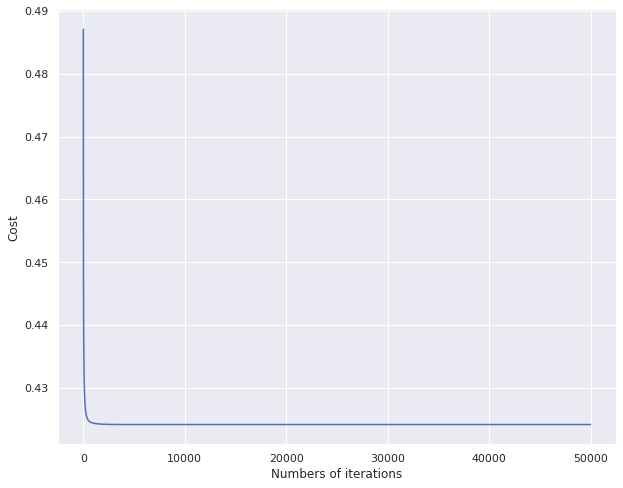

In [ ]:
# model train for alpha = 0.2
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
linearmodel_tr1 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 2633 

Model Cost 0.42429422523896226 

Model Coefficients: 
[[ 0.00152395 -0.42136265  0.49812043  0.05033639 -0.00845163  0.45436409
   0.03915531  0.19553976 -0.42571325  0.62204906 -0.56766399  0.17926204
   0.07656438  0.02099841  0.11830854 -0.10523908 -0.30468785 -0.06419787
  -0.58131049  0.23039637 -0.15059403  0.00868157  0.05531915  0.01653588
  -0.0014298  -0.0014298 ]]
alpha: 0.1


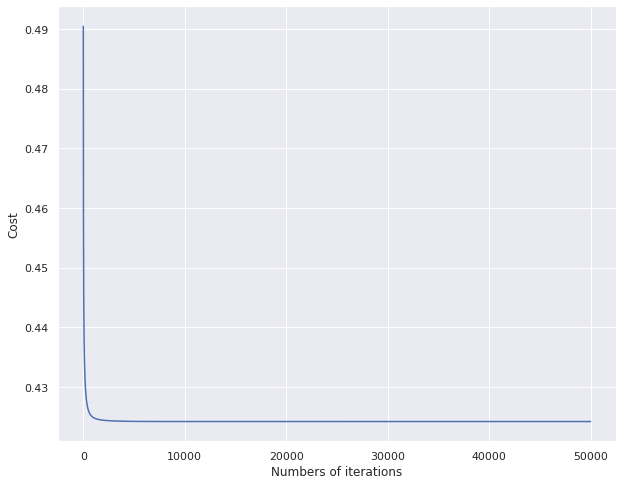

In [ ]:
# model train for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.1, 50000);
    return coeffmatrix;
linearmodel_tr2 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 10128 

Model Cost 0.4248081342861614 

Model Coefficients: 
[[-0.00165575 -0.41691307  0.49820895  0.0507793  -0.01201055  0.44101571
   0.03814751  0.19602806 -0.42428021  0.62307268 -0.56371734  0.17791716
   0.07829592  0.02138516  0.1117705  -0.10437346 -0.30671865 -0.06466846
  -0.50222966  0.1724506  -0.10685995  0.00888305  0.05695109  0.01629815
  -0.00145794 -0.00145794]]
alpha: 0.01


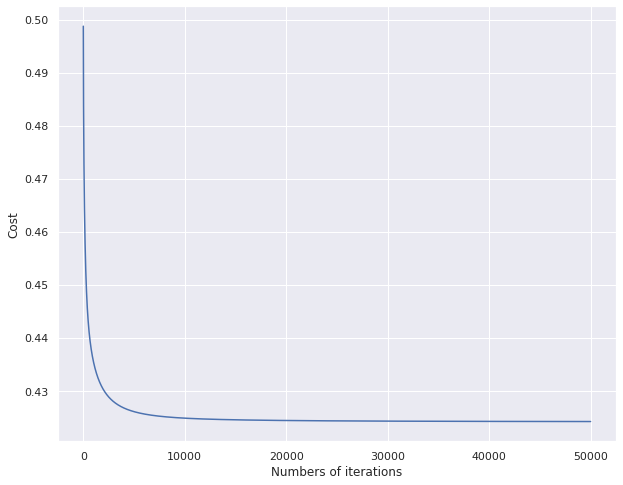

In [ ]:
# model train for alpha = 0.01
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.01, 50000);
    return coeffmatrix;
linearmodel_tr3 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 15351 

Model Cost 0.42515741643389726 

Model Coefficients: 
[[-0.01356205 -0.39932342  0.49964652  0.05103939 -0.01724464  0.41498437
   0.03801448  0.1971649  -0.42536271  0.61869357 -0.54947443  0.17527305
   0.07946168  0.02180177  0.101731   -0.10389027 -0.30948441 -0.0655016
  -0.37992094  0.08647422 -0.04179997  0.00906687  0.05951843  0.01594302
  -0.00149986 -0.00149986]]
alpha: 0.005


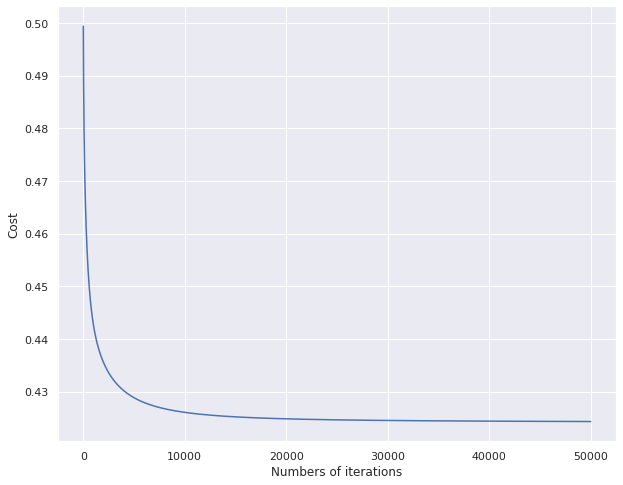

In [ ]:
# model train for alpha = 0.005
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.005, 50000);
    return coeffmatrix;
linearmodel_tr4 = devlinearmodel(x1_train, y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 1097 

Model Cost 0.3525681220651725 

Model Coefficients: 
[[ 0.06804658 -0.45496688  0.43234589  0.08523178  0.02111248  0.46976428
  -0.09340633  0.18101005 -0.39832427  0.55493136 -0.47734704  0.12618548
   0.05360031  0.04008883  0.03483707 -0.02949298 -0.28368212 -0.05700853
  -0.34464933  0.02962337 -0.02200593 -0.00062939  0.04514352  0.01303068
  -0.01126252 -0.01126252]]
alpha: 0.2


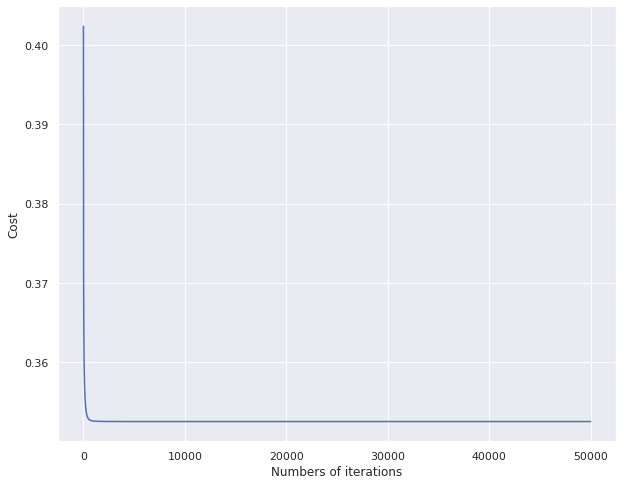

In [ ]:
# model test for alpha = 0.2
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
linearmodel_te1 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 1800 

Model Cost 0.35259617966198087 

Model Coefficients: 
[[ 0.06804658 -0.45496688  0.43234589  0.08523178  0.02111248  0.46976428
  -0.09340633  0.18101005 -0.39832427  0.55493136 -0.47734703  0.12618548
   0.05360031  0.04008883  0.03483707 -0.02949298 -0.28368212 -0.05700853
  -0.34464933  0.02962337 -0.02200592 -0.00062939  0.04514352  0.01303068
  -0.01126252 -0.01126252]]
alpha: 0.1


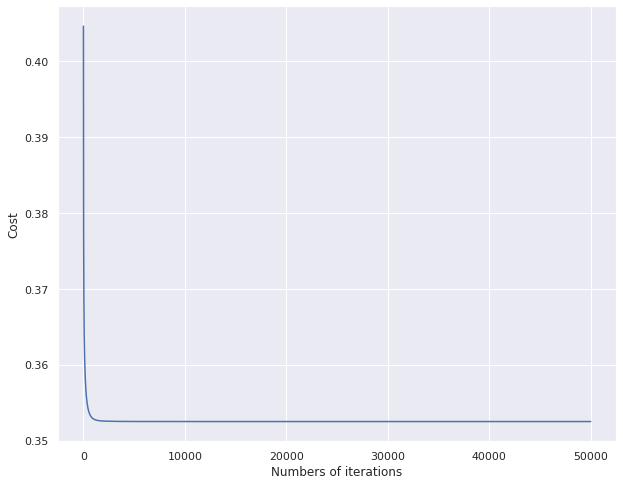

In [ ]:
# model test for alpha = 0.1
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.1, 50000);
    return coeffmatrix;
linearmodel_te2 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 9344 

Model Cost 0.3529091039435765 

Model Coefficients: 
[[ 6.63463561e-02 -4.52745845e-01  4.32381524e-01  8.55115402e-02
   1.93338930e-02  4.63140028e-01 -9.39649153e-02  1.81417398e-01
  -3.97690406e-01  5.55665963e-01 -4.75459990e-01  1.25504932e-01
   5.43405965e-02  4.04004220e-02  3.15603820e-02 -2.91235205e-02
  -2.84704584e-01 -5.73855690e-02 -3.04468312e-01  2.46340760e-04
   3.10290795e-04 -5.11703027e-04  4.59749451e-02  1.28091211e-02
  -1.12409852e-02 -1.12409852e-02]]
alpha: 0.01


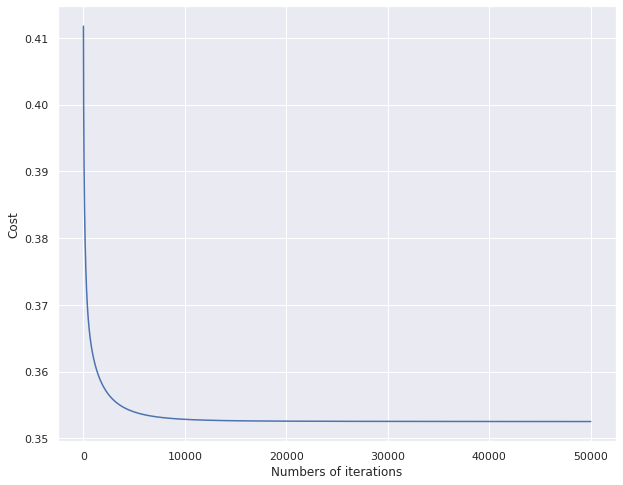

In [ ]:
# model test for alpha = 0.01
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.01, 50000);
    return coeffmatrix;
linearmodel_te3 = devlinearmodel(x1_test, y1_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 14668 

Model Cost 0.3531973200993261 

Model Coefficients: 
[[ 5.75875033e-02 -4.39782761e-01  4.33586851e-01  8.56201302e-02
   1.66379844e-02  4.48444215e-01 -9.37184672e-02  1.82553356e-01
  -3.99689211e-01  5.51806427e-01 -4.65247585e-01  1.23739348e-01
   5.39590477e-02  4.07339087e-02  2.64689659e-02 -2.92824580e-02
  -2.85851155e-01 -5.79703783e-02 -2.41893651e-01 -4.27167867e-02
   3.29785732e-02 -4.69533833e-04  4.73284890e-02  1.24115286e-02
  -1.11922348e-02 -1.11922348e-02]]
alpha: 0.005


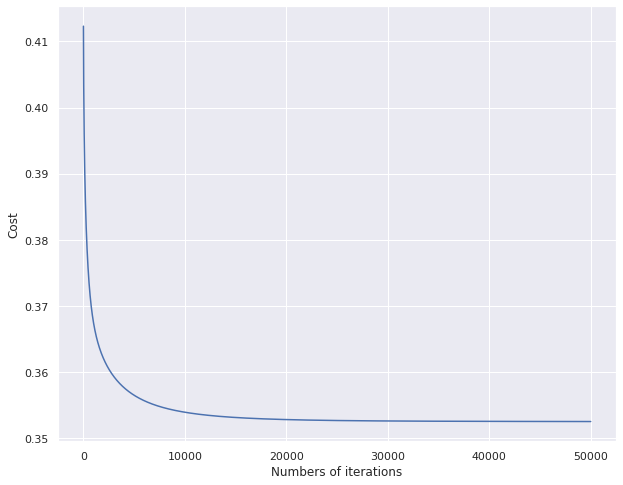

In [ ]:
# model test for alpha = 0.005
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.005, 50000);
    return coeffmatrix;
linearmodel_te4 = devlinearmodel(x1_test, y1_test)

In [ ]:
reg = linear_model.LinearRegression()
# train the model using train sets
reg.fit(x1_train, y1_train)
# regression corfficients
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 0.00152395 -0.42136265  0.49812043  0.05033639 -0.00845163  0.4543641
   0.03915531  0.19553976 -0.42571325  0.62204906 -0.56766399  0.17926204
   0.07656438  0.02099841  0.11830854 -0.10523908 -0.30468785 -0.06419787
  -0.58131049  0.23039638 -0.15059403  0.00868157  0.05531915  0.01653588
  -0.0014298  -0.0014298 ]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.5 

Threshold level 1e-07 

Cost Function converges at 1751 

Model Cost 0.42423184484910287 

Model Coefficients: 
[[ 0.00152395 -0.42136265  0.49812043  0.05033639 -0.00845163  0.4543641
   0.03915531  0.19553976 -0.42571325  0.62204906 -0.56766399  0.17926204
   0.07656438  0.02099841  0.11830854 -0.10523908 -0.30468785 -0.06419787
  -0.58131049  0.23039638 -0.15059403  0.00868157  0.05531915  0.01653588
  -0.0014298  -0.0014298 ]]
alpha: 0.2


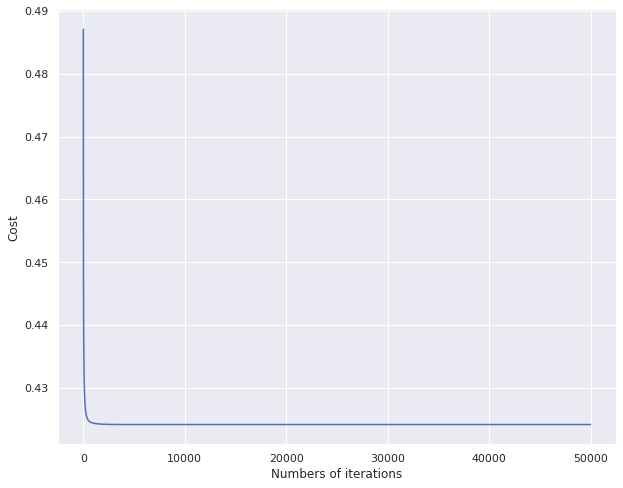

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]

Initial Cost:  0.4128407216503367 

Threshold level 1e-07 

Cost Function converges at 1097 

Model Cost 0.3525681220651725 

Model Coefficients: 
[[ 0.06804658 -0.45496688  0.43234589  0.08523178  0.02111248  0.46976428
  -0.09340633  0.18101005 -0.39832427  0.55493136 -0.47734704  0.12618548
   0.05360031  0.04008883  0.03483707 -0.02949298 -0.28368212 -0.05700853
  -0.34464933  0.02962337 -0.02200593 -0.00062939  0.04514352  0.01303068
  -0.01126252 -0.01126252]]
alpha: 0.2


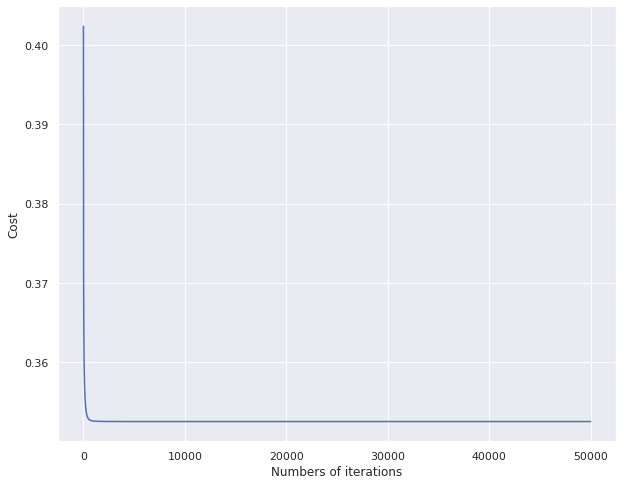

In [ ]:
# linear regression for best alpha value
def devlinearmodel(datafile, datatarget):
    coeffmatrix = np.zeros((1, len(datafile[0])));
    print(coeffmatrix);
    print();
    initialcost = costfuct(datafile, datatarget, coeffmatrix);
    print('Initial Cost: ', initialcost, '\n');
    coeffmatrix, costhistory = gradientdescent(datafile, datatarget, coeffmatrix, 0.2, 50000);
    return coeffmatrix;
    
linearmodel_trbe = devlinearmodel(x1_train, y1_train)
linearmodel_tebe = devlinearmodel(x1_test, y1_test)

In [ ]:
# RMSE for train

predictedtarget_tr1 = predict(x1_train, linearmodel_tr1)
predictedtarget_tr2 = predict(x1_train, linearmodel_tr2)
predictedtarget_tr3 = predict(x1_train, linearmodel_tr3)
predictedtarget_tr4 = predict(x1_train, linearmodel_tr4)

modelMSE_tr1 = calcRMSE(y1_train, predictedtarget_tr1)
modelMSE_tr2 = calcRMSE(y1_train, predictedtarget_tr2)
modelMSE_tr3 = calcRMSE(y1_train, predictedtarget_tr3)
modelMSE_tr4 = calcRMSE(y1_train, predictedtarget_tr4)

In [ ]:
print ('Model RMSE Train1 alpha 0.2:', modelMSE_tr1, '\n')
print ('Model RMSE Train2 alpha 0.1:', modelMSE_tr2, '\n')
print ('Model RMSE Train3 alpha 0.01:', modelMSE_tr3, '\n')
print ('Model RMSE Train4 alpha 0.005:', modelMSE_tr4, '\n')

Model RMSE Train1 alpha 0.2: [0.84833003] 

Model RMSE Train2 alpha 0.1: [0.84833003] 

Model RMSE Train3 alpha 0.01: [0.84837395] 

Model RMSE Train4 alpha 0.005: [0.84861699] 



In [ ]:
#RMSE for test

predictedtarget_te1 = predict(x1_test, linearmodel_te1)
predictedtarget_te2 = predict(x1_test, linearmodel_te2)
predictedtarget_te3 = predict(x1_test, linearmodel_te3)
predictedtarget_te4 = predict(x1_test, linearmodel_te4)

modelMSE_te1 = calcRMSE(y1_test, predictedtarget_te1)
modelMSE_te2 = calcRMSE(y1_test, predictedtarget_te2)
modelMSE_te3 = calcRMSE(y1_test, predictedtarget_te3)
modelMSE_te4 = calcRMSE(y1_test, predictedtarget_te4)

In [ ]:
print ('Model RMSE Test1 alpha 0.2:', modelMSE_te1, '\n')
print ('Model RMSE Test2 alpha 0.1:', modelMSE_te2, '\n')
print ('Model RMSE Test3 alpha 0.01:', modelMSE_te3, '\n')
print ('Model RMSE Test4 alpha 0.005:', modelMSE_te4, '\n')

Model RMSE Test1 alpha 0.2: [0.70503431] 

Model RMSE Test2 alpha 0.1: [0.70503431] 

Model RMSE Test3 alpha 0.01: [0.70504565] 

Model RMSE Test4 alpha 0.005: [0.70511148] 



In [ ]:
#R-Squared for training

modelR1_tr1 = modelRsquared(y1_train, predictedtarget_tr1)
modelR1_tr2 = modelRsquared(y1_train, predictedtarget_tr2)
modelR1_tr3 = modelRsquared(y1_train, predictedtarget_tr3)
modelR1_tr4 = modelRsquared(y1_train, predictedtarget_tr4)

In [ ]:
print('Model R-Squared Training:', '\n', modelR1_tr1, '\n', modelR1_tr2, '\n', modelR1_tr3, '\n', modelR1_tr4, '\n')

Model R-Squared Training: 
 0.15166997471338173 
 0.15166997471338173 
 0.15162605338048774 
 0.15138301384936148 



In [ ]:
#R-Squared for test

modelR1_te1 = modelRsquared(y1_test, predictedtarget_te1)
modelR1_te2 = modelRsquared(y1_test, predictedtarget_te2)
modelR1_te3 = modelRsquared(y1_test, predictedtarget_te3)
modelR1_te4 = modelRsquared(y1_test, predictedtarget_te4)

In [ ]:
print('Model R-Squared Testing:', '\n', modelR1_te1, '\n', modelR1_te2, '\n', modelR1_te3, '\n', modelR1_te4, '\n')

Model R-Squared Testing: 
 0.14395177411738047 
 0.14395177411738047 
 0.1439379960217747 
 0.1438580709847017 



# Conclusion

* The best feature yields in the feature importance graph, where we see that the 
'RH_8' is the most important feature and 'T5' is least important feature.

* The top three important features are 'Humidity' attributes, which is lead to the conclusion that the 'Humidity' affects the power more than the Temperature.

* 'Windspeed' and 'Temperature' features are least important as wind does not affect the power consumption inside the house.

* So the controlling the 'Humidity' inside house may lead to save Energy consumptions.

* 'Decision Tree Regression' found to be the best performing model

* This Dataset has the date time component so the best performance can be achieved by using 'Time Series Analysis' concept.